In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_theme_A_outlier = pd.read_csv('reference/data_catalog/processed_data.csv')
dataset_theme_A_outlier.head(5)

,Unnamed: 0,year,month,week,Average_sales_dollars,Average_sales_units,Average_sales_lbs,Average_post_week,Average_searchVolume,Theme_Name_low carb,Theme_Name_salmon
0,49926,2016.0,1.0,2,7.476472,5.820083,4.653960,0.000613,8.803194,1,0
1,49927,2016.0,1.0,3,5.717028,3.828641,2.639057,0.000525,8.931505,1,0
2,49928,2016.0,1.0,4,4.543295,2.639057,1.609438,0.000769,8.801781,1,0
3,49929,2016.0,2.0,5,3.850148,2.197225,1.098612,0.000465,8.988571,1,0
4,49930,2016.0,2.0,6,4.442651,2.833213,1.609438,0.000799,9.079469,1,0


### 6. Feature Selection

In [3]:
dataset_theme_A_outlier

,Unnamed: 0,year,month,week,Average_sales_dollars,Average_sales_units,Average_sales_lbs,Average_post_week,Average_searchVolume,Theme_Name_low carb,Theme_Name_salmon
0,49926,2016.0,1.0,2,7.476472,5.820083,4.653960,0.000613,8.803194,1,0
1,49927,2016.0,1.0,3,5.717028,3.828641,2.639057,0.000525,8.931505,1,0
2,49928,2016.0,1.0,4,4.543295,2.639057,1.609438,0.000769,8.801781,1,0
3,49929,2016.0,2.0,5,3.850148,2.197225,1.098612,0.000465,8.988571,1,0
4,49930,2016.0,2.0,6,4.442651,2.833213,1.609438,0.000799,9.079469,1,0
...,...,...,...,...,...,...,...,...,...,...,...
151733,2207793,2019.0,8.0,34,7.558517,4.595120,5.981414,0.000560,26.240462,1,0
151734,2207794,2019.0,8.0,35,7.676474,4.691348,6.077642,0.000514,26.457075,1,0
151735,2207795,2019.0,9.0,37,7.591357,4.744932,6.131226,0.000586,25.674463,1,0
151736,2207796,2019.0,9.0,38,7.720462,4.867534,6.253829,0.000492,26.102483,1,0


#### 6.1: Feature Selection with Pearson Correlation


#### Correlation Matrix with Heatmap


Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [5]:
dataset_theme_A_outlier.corr()['Average_sales_units'].sort_values()

Unnamed: 0              -0.229470
Average_searchVolume    -0.029889
year                    -0.027868
Average_post_week       -0.021529
month                    0.002059
week                     0.002087
Theme_Name_low carb      0.067989
Theme_Name_salmon        0.074164
Average_sales_lbs        0.688702
Average_sales_dollars    0.767722
Average_sales_units      1.000000
Name: Average_sales_units, dtype: float64

In [6]:
dataset_theme_A_outlier = dataset_theme_A_outlier.drop('Unnamed: 0',axis=1)

In [7]:
dataset_theme_A_outlier

,year,month,week,Average_sales_dollars,Average_sales_units,Average_sales_lbs,Average_post_week,Average_searchVolume,Theme_Name_low carb,Theme_Name_salmon
0,2016.0,1.0,2,7.476472,5.820083,4.653960,0.000613,8.803194,1,0
1,2016.0,1.0,3,5.717028,3.828641,2.639057,0.000525,8.931505,1,0
2,2016.0,1.0,4,4.543295,2.639057,1.609438,0.000769,8.801781,1,0
3,2016.0,2.0,5,3.850148,2.197225,1.098612,0.000465,8.988571,1,0
4,2016.0,2.0,6,4.442651,2.833213,1.609438,0.000799,9.079469,1,0
...,...,...,...,...,...,...,...,...,...,...
151733,2019.0,8.0,34,7.558517,4.595120,5.981414,0.000560,26.240462,1,0
151734,2019.0,8.0,35,7.676474,4.691348,6.077642,0.000514,26.457075,1,0
151735,2019.0,9.0,37,7.591357,4.744932,6.131226,0.000586,25.674463,1,0
151736,2019.0,9.0,38,7.720462,4.867534,6.253829,0.000492,26.102483,1,0


<AxesSubplot:>

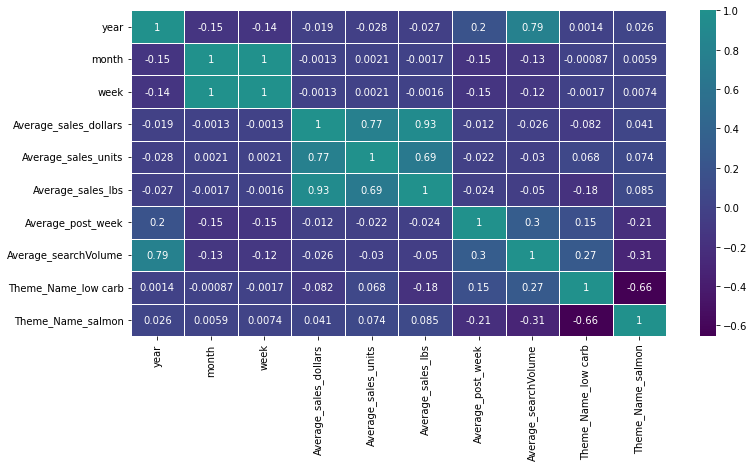

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset_theme_A_outlier.corr(),linewidth=0.5,annot=True,cmap='viridis',center=1)

##### According to the heatmap correlation index, year, week and month are not creating any significant impact on Average_sales

#### 6.2:Information gain - mutual information In Regression


Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [9]:
from sklearn.feature_selection import mutual_info_regression

In [10]:
X = dataset_theme_A_outlier.iloc[:,:]    #independent columns
X = X.drop('Average_sales_units',axis=1)
y = dataset_theme_A_outlier.iloc[:,3]    #target column i.e Average_sales_units


In [11]:
X

,year,month,week,Average_sales_dollars,Average_sales_lbs,Average_post_week,Average_searchVolume,Theme_Name_low carb,Theme_Name_salmon
0,2016.0,1.0,2,7.476472,4.653960,0.000613,8.803194,1,0
1,2016.0,1.0,3,5.717028,2.639057,0.000525,8.931505,1,0
2,2016.0,1.0,4,4.543295,1.609438,0.000769,8.801781,1,0
3,2016.0,2.0,5,3.850148,1.098612,0.000465,8.988571,1,0
4,2016.0,2.0,6,4.442651,1.609438,0.000799,9.079469,1,0
...,...,...,...,...,...,...,...,...,...
151733,2019.0,8.0,34,7.558517,5.981414,0.000560,26.240462,1,0
151734,2019.0,8.0,35,7.676474,6.077642,0.000514,26.457075,1,0
151735,2019.0,9.0,37,7.591357,6.131226,0.000586,25.674463,1,0
151736,2019.0,9.0,38,7.720462,6.253829,0.000492,26.102483,1,0


In [12]:
y

0         7.476472
1         5.717028
2         4.543295
3         3.850148
4         4.442651
            ...   
151733    7.558517
151734    7.676474
151735    7.591357
151736    7.720462
151737    7.864804
Name: Average_sales_dollars, Length: 151738, dtype: float64

In [13]:
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.04147153, 0.05576276, 0.06484274, 9.75658209, 1.61213745,
       0.03423597, 0.05259366, 0.01528674, 0.03283766])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Average_sales_dollars    9.756582
Average_sales_lbs        1.612137
week                     0.064843
month                    0.055763
Average_searchVolume     0.052594
year                     0.041472
Average_post_week        0.034236
Theme_Name_salmon        0.032838
Theme_Name_low carb      0.015287
dtype: float64

<AxesSubplot:>

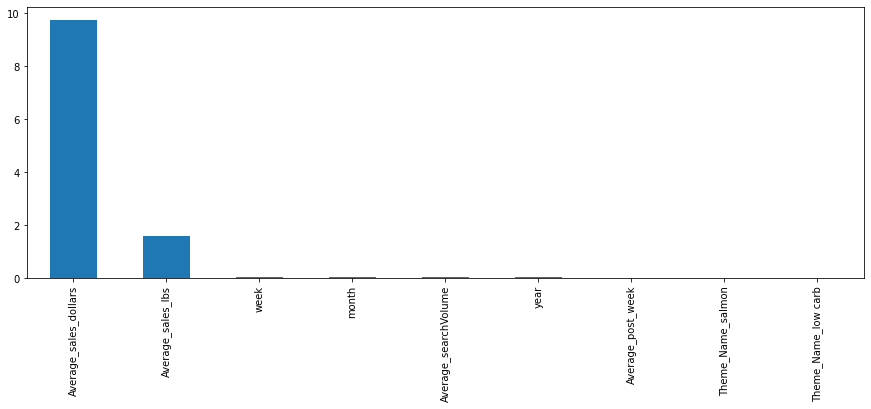

In [15]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Here also, we can deduce that year,week and month can be dropped!!!

#### 6.3:Detecting Multicollinearity with Variance Inflation Factor(VIF).

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

##### As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X.columns

Index(['year', 'month', 'week', 'Average_sales_dollars', 'Average_sales_lbs',
       'Average_post_week', 'Average_searchVolume', 'Theme_Name_low carb',
       'Theme_Name_salmon'],
      dtype='object')

In [18]:
len(X.columns)

9

In [19]:
x = X.values

In [20]:
x = x.astype(np.float)

C:\Users\nishant.wadhwan\AppData\Local\Temp\ipykernel_4728\1911961902.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


In [21]:
x

array([[2.01600000e+03, 1.00000000e+00, 2.00000000e+00, ...,
        8.80319439e+00, 1.00000000e+00, 0.00000000e+00],
       [2.01600000e+03, 1.00000000e+00, 3.00000000e+00, ...,
        8.93150458e+00, 1.00000000e+00, 0.00000000e+00],
       [2.01600000e+03, 1.00000000e+00, 4.00000000e+00, ...,
        8.80178137e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.01900000e+03, 9.00000000e+00, 3.70000000e+01, ...,
        2.56744630e+01, 1.00000000e+00, 0.00000000e+00],
       [2.01900000e+03, 9.00000000e+00, 3.80000000e+01, ...,
        2.61024826e+01, 1.00000000e+00, 0.00000000e+00],
       [2.01900000e+03, 9.00000000e+00, 3.90000000e+01, ...,
        2.59588572e+01, 1.00000000e+00, 0.00000000e+00]])

In [22]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x, i)
            for i in range(len(X.columns))]

print(vif_data)


                 feature         VIF
0                   year   44.709556
1                  month  774.346611
2                   week  679.887338
3  Average_sales_dollars  137.753972
4      Average_sales_lbs   79.322251
5      Average_post_week    3.546719
6   Average_searchVolume    5.891533
7    Theme_Name_low carb   10.048759
8      Theme_Name_salmon    2.048104


##### As we can see, year and Average_searchVolume have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the time will move forward, search_volume will increase due to more advancements and more number of people using such platforms like google, walmart etc. Hence, considering these two features together leads to a model with high multicollinearity.

##### As we can see, Average_sales_dollars and Average_sales_lbs have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the revenue in dollar will increase, lbs weight value will also increase. Hence, considering these two features together leads to a model with high multicollinearity.

##### As we can see, Average_sales_dollars and Average_post_month have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the revenue in dollar will increase, company will also increase number of posts related to particular theme to increase sales further. Hence, considering these two features together leads to a model with high multicollinearity.

### 7.Build the sales model and identify the driver of sales (Theme Level)

In [23]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151738 entries, 0 to 151737
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   151738 non-null  float64
 1   month                  151738 non-null  float64
 2   week                   151738 non-null  int64  
 3   Average_sales_dollars  151738 non-null  float64
 4   Average_sales_units    151738 non-null  float64
 5   Average_sales_lbs      151738 non-null  float64
 6   Average_post_week      151738 non-null  float64
 7   Average_searchVolume   151738 non-null  float64
 8   Theme_Name_low carb    151738 non-null  int64  
 9   Theme_Name_salmon      151738 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 11.6 MB


Dropping the columns with higher VIF Values (greater than 10) as max acceptible level is 10, to avoid multi-collinearity problem. Dropping week, year and also dropping month as it doesnt have significant impact on sales_units values

In [24]:
dataset_theme_A_outlier.drop(['week','year','month'], axis=1, inplace=True)

In [25]:
dataset_theme_A_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151738 entries, 0 to 151737
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Average_sales_dollars  151738 non-null  float64
 1   Average_sales_units    151738 non-null  float64
 2   Average_sales_lbs      151738 non-null  float64
 3   Average_post_week      151738 non-null  float64
 4   Average_searchVolume   151738 non-null  float64
 5   Theme_Name_low carb    151738 non-null  int64  
 6   Theme_Name_salmon      151738 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 8.1 MB


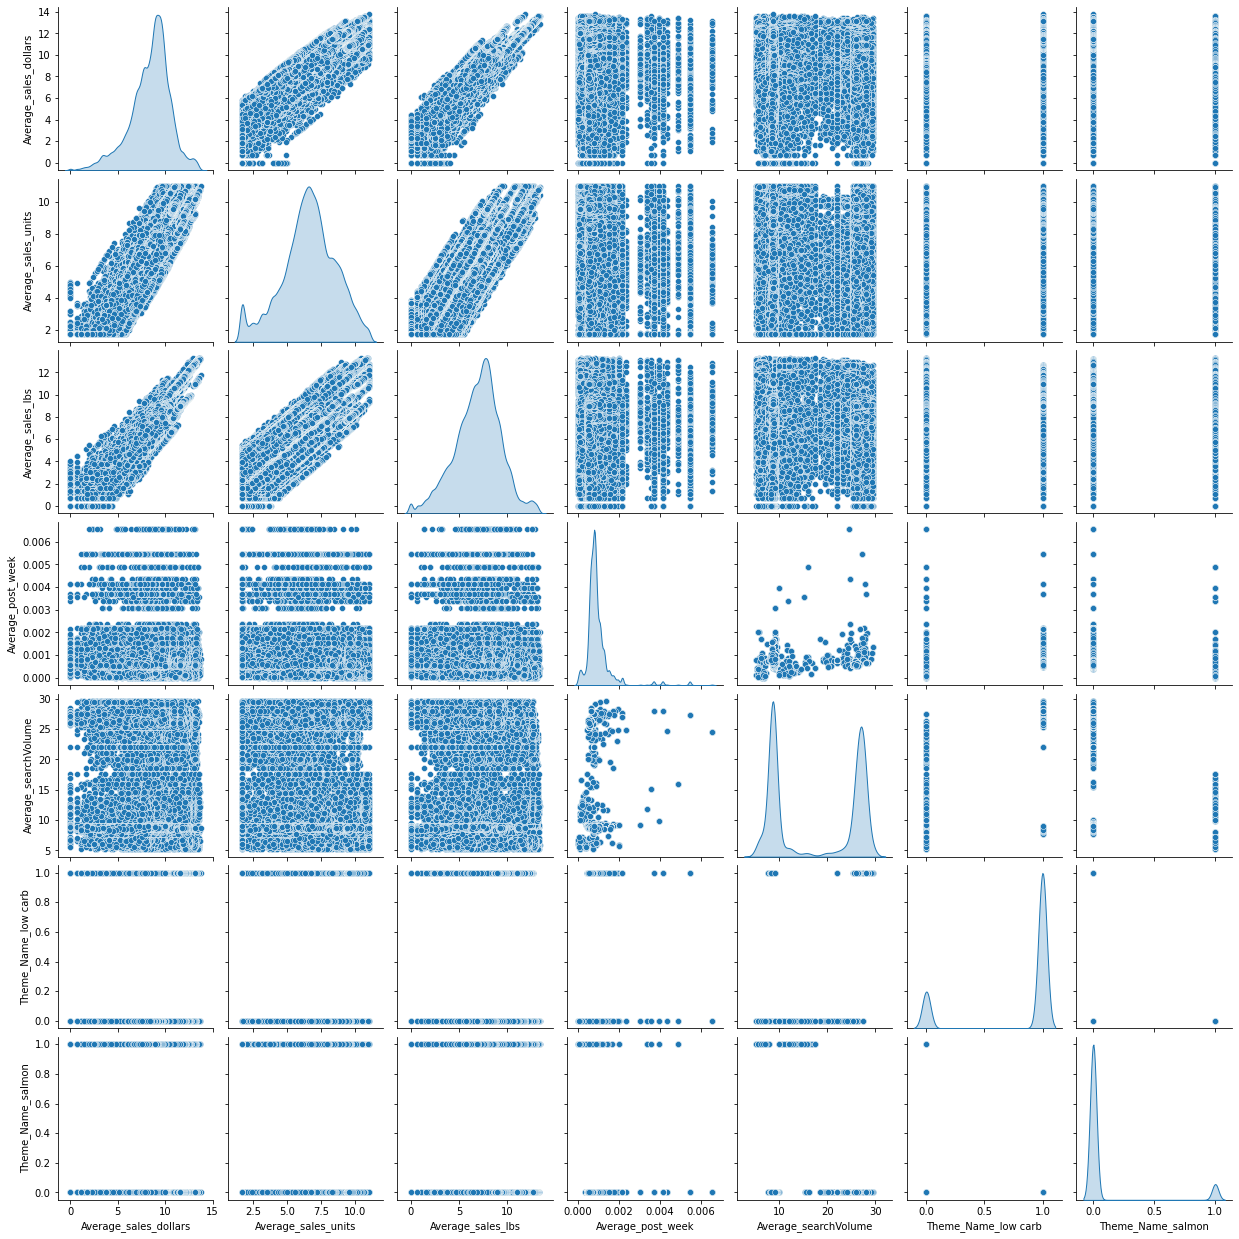

In [26]:
# Relationships between features
sns.pairplot(dataset_theme_A_outlier,diag_kind='kde')

In [27]:
dataset_theme_A_outlier

,Average_sales_dollars,Average_sales_units,Average_sales_lbs,Average_post_week,Average_searchVolume,Theme_Name_low carb,Theme_Name_salmon
0,7.476472,5.820083,4.653960,0.000613,8.803194,1,0
1,5.717028,3.828641,2.639057,0.000525,8.931505,1,0
2,4.543295,2.639057,1.609438,0.000769,8.801781,1,0
3,3.850148,2.197225,1.098612,0.000465,8.988571,1,0
4,4.442651,2.833213,1.609438,0.000799,9.079469,1,0
...,...,...,...,...,...,...,...
151733,7.558517,4.595120,5.981414,0.000560,26.240462,1,0
151734,7.676474,4.691348,6.077642,0.000514,26.457075,1,0
151735,7.591357,4.744932,6.131226,0.000586,25.674463,1,0
151736,7.720462,4.867534,6.253829,0.000492,26.102483,1,0


In [28]:
X = dataset_theme_A_outlier.drop('Average_sales_units',axis=1).values
y = dataset_theme_A_outlier['Average_sales_units'].values

In [381]:
X

array([[7.47647238e+00, 4.65396035e+00, 6.13137377e-04, 8.80319439e+00,
        1.00000000e+00, 0.00000000e+00],
       [5.71702770e+00, 2.63905733e+00, 5.24607453e-04, 8.93150458e+00,
        1.00000000e+00, 0.00000000e+00],
       [4.54329478e+00, 1.60943791e+00, 7.68547986e-04, 8.80178137e+00,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [7.59135705e+00, 6.13122649e+00, 5.85611916e-04, 2.56744630e+01,
        1.00000000e+00, 0.00000000e+00],
       [7.72046169e+00, 6.25382881e+00, 4.91747001e-04, 2.61024826e+01,
        1.00000000e+00, 0.00000000e+00],
       [7.86480400e+00, 6.41673228e+00, 5.65199776e-04, 2.59588572e+01,
        1.00000000e+00, 0.00000000e+00]])

In [382]:
y

array([5.82008293, 3.8286414 , 2.63905733, ..., 4.74493213, 4.86753445,
       5.03043792])

In [383]:
import statsmodels.api as sm

In [384]:
X = np.append(arr = np.ones((151738, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6]]
X_opt = X_opt.astype(np.float64)

In [385]:
X_opt[0]

array([1.00000000e+00, 7.47647238e+00, 4.65396035e+00, 6.13137377e-04,
       8.80319439e+00, 1.00000000e+00, 0.00000000e+00])

#### Backward Elimination for selecting features further

In [386]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()


In [387]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 4.429e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:29   Log-Likelihood:            -2.4197e+05
No. Observations:              151738   AIC:                         4.840e+05
Df Residuals:                  151731   BIC:                         4.840e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9037      0.018    -50.016      0.000      -0.939      -0.868
x1             0.7918      0.004    190.480      0.000       0.784       0.800
x2            -0.0497      0.004    -13.306      0.000      -0.057      -0.042
x3            -3.2499      4.977     -0.653      0.514     -13.005       6.506
x4            -0.0037      0.000    -10.033      0.000      -0.004      -0.003
x5             1.3808      0.011    127.982      0.000       1.360       1.402
x6             1.4998      0.014    104.257      0.000       1.472       1.528
==============================================================================
Omnibus:                    16773.597   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4643.190
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       2.145   Cond. No.                     3.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Select a significance level of 0.05

We need to drop the column Average_post_week since it's p value is greater than 0.05

In [388]:
X_opt = X[:, [0, 1, 2, 4, 5, 6]]

In [389]:
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                 5.315e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:36   Log-Likelihood:            -2.4197e+05
No. Observations:              151738   AIC:                         4.840e+05
Df Residuals:                  151732   BIC:                         4.840e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9059      0.018    -50.990      0.000      -0.941      -0.871
x1             0.7918      0.004    190.479      0.000       0.784       0.800
x2            -0.0497      0.004    -13.303      0.000      -0.057      -0.042
x3            -0.0038      0.000    -10.556      0.000      -0.004      -0.003
x4             1.3809      0.011    128.011      0.000       1.360       1.402
x5             1.5009      0.014    105.011      0.000       1.473       1.529
==============================================================================
Omnibus:                    16772.704   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4643.090
Skew:                          -0.032   Prob(JB):                         0.00
Kurtosis:                       2.145   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.3, random_state=101)

In [392]:
X_train

array([[ 1.        ,  7.45240245,  5.3981627 , 27.9436371 ,  1.        ,
         0.        ],
       [ 1.        ,  8.90666441,  6.92951677,  8.21642129,  1.        ,
         0.        ],
       [ 1.        ,  6.48463524,  2.63905733,  8.87719144,  1.        ,
         0.        ],
       ...,
       [ 1.        ,  7.64873979,  5.76205138, 26.46210484,  1.        ,
         0.        ],
       [ 1.        , 10.78359136,  9.99834308, 26.24046153,  1.        ,
         0.        ],
       [ 1.        ,  8.0839457 ,  7.54009032,  8.61130926,  1.        ,
         0.        ]])

In [393]:
y_train

array([7.0724219 , 8.60318738, 6.11589213, ..., 7.43661727, 6.77992191,
       4.31748811])

In [394]:
X_test

array([[ 1.        ,  9.56843431,  8.70483391, 25.84320382,  1.        ,
         0.        ],
       [ 1.        ,  3.61091791,  1.60943791,  8.76192   ,  1.        ,
         0.        ],
       [ 1.        ,  5.62762111,  2.07944154, 26.91834222,  1.        ,
         0.        ],
       ...,
       [ 1.        ,  9.6363268 ,  8.62748155,  8.82368101,  1.        ,
         0.        ],
       [ 1.        , 10.44307554,  9.94783931,  8.59978821,  1.        ,
         0.        ],
       [ 1.        ,  8.53915036,  4.9698133 ,  8.66143809,  1.        ,
         0.        ]])

In [395]:
y_test

array([ 5.93224519,  1.94591015,  3.61091791, ...,  6.92264389,
       10.15549063,  5.22035583])

In [396]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()


In [397]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 3.703e+04
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:53:42   Log-Likelihood:            -1.6934e+05
No. Observations:              106216   AIC:                         3.387e+05
Df Residuals:                  106210   BIC:                         3.387e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8805      0.021    -41.503      0.000      -0.922      -0.839
x1             0.7888      0.005    159.036      0.000       0.779       0.799
x2            -0.0489      0.004    -10.979      0.000      -0.058      -0.040
x3            -0.0041      0.000     -9.621      0.000      -0.005      -0.003
x4             1.3789      0.013    106.942      0.000       1.354       1.404
x5             1.5009      0.017     87.778      0.000       1.467       1.534
==============================================================================
Omnibus:                    11148.418   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3163.533
Skew:                          -0.025   Prob(JB):                         0.00
Kurtosis:                       2.156   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
test_predictions = regressor_OLS.predict(X_test)

In [399]:
test_predictions

array([7.51432088, 3.23213231, 4.7255472 , ..., 7.64143342, 8.21411698,
       6.95563754])

In [400]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [401]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [402]:
MAE

1.0239619862442195

In [403]:
MSE

1.4237665208185204

In [404]:
RMSE

1.1932168792044975

In [405]:
from sklearn.metrics import r2_score
r2_score(y_test, test_predictions)

0.6390554699331108

### Plotting Residuals

In [406]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

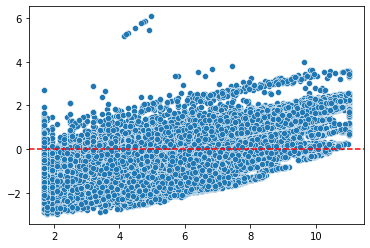

In [407]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [408]:
len(test_res)

45522

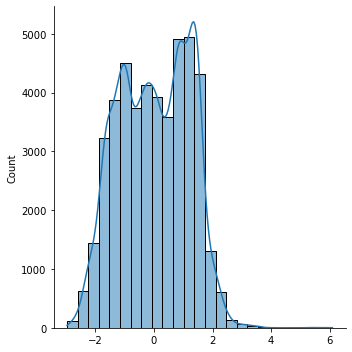

In [409]:
sns.displot(test_res,bins=25,kde=True)

#### For checking normality

In [410]:
import scipy as sp

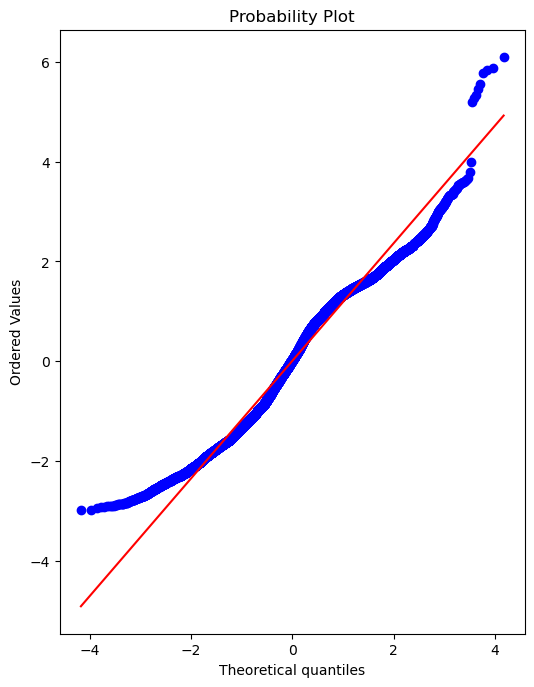

In [411]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

### Our model is:
y = -0.88 + 0.78 * (Average_sales_dollars) - 0.048 * (Average_sales_lbs) -0.0041 * (Average_searchvolume) + 1.38 * (Theme_Name_lowcarb) + 1.5 * (Theme_Name_salmon)